# Test noise progression for the diffusion models

In [1]:
import IPython

import torch
from torch.utils.data import DataLoader
import torchaudio
import matplotlib.pyplot as plt

from utils.diffusion import forward_diffusion_sample, DiffusionConstants
from loaders import MP3SliceDataset

### Create music player

In [2]:
# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/mp3" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

### Draw sample from the Lvl0 dataset

In [3]:
dataset = MP3SliceDataset(preload=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
for sample in dataloader:
    music_sample = sample['music slice'].squeeze(0)
    print(f"Current track is {sample['track name'][0]}")
    break

Loading file data/music_samples/000-datatensor.pt...
Music file data/music_samples/000-datatensor.pt is loaded.
Loading file data/music_samples/000-metadata.pkl...
Music file data/music_samples/000-metadata.pkl is loaded.
Current track is data/music_samples/01 Infected Mushroom - Bust A Move (Bliss Remix).mp3


### Noise them

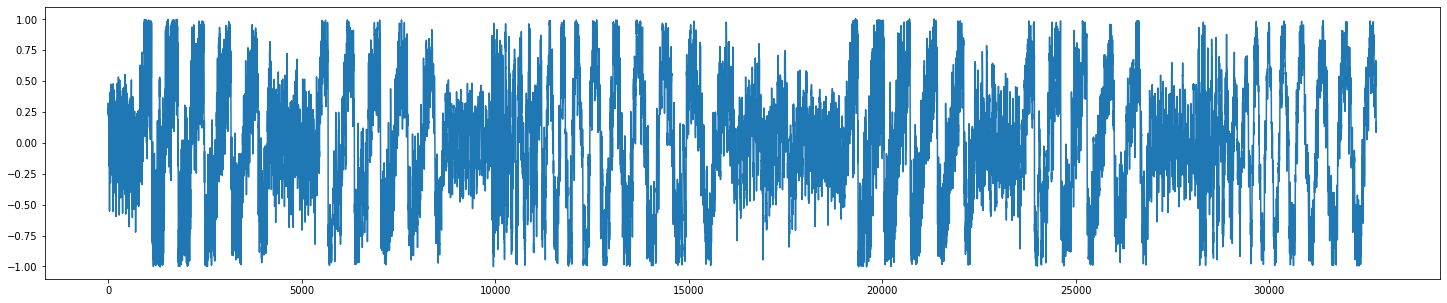

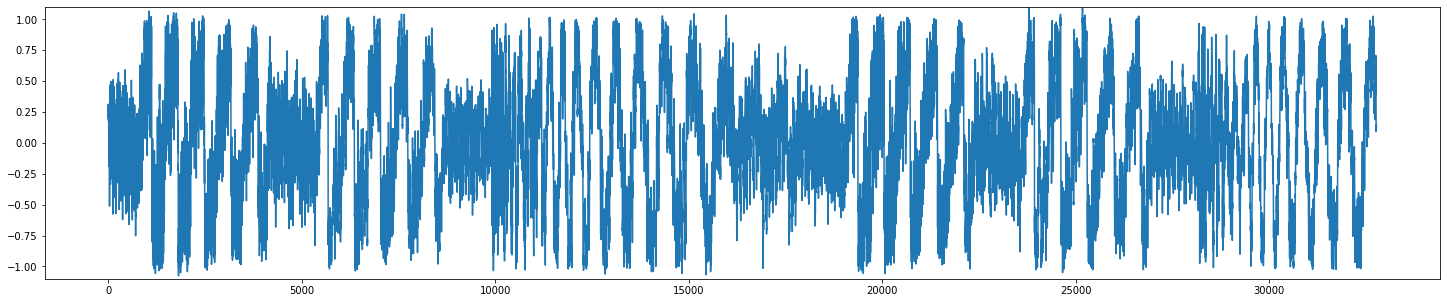

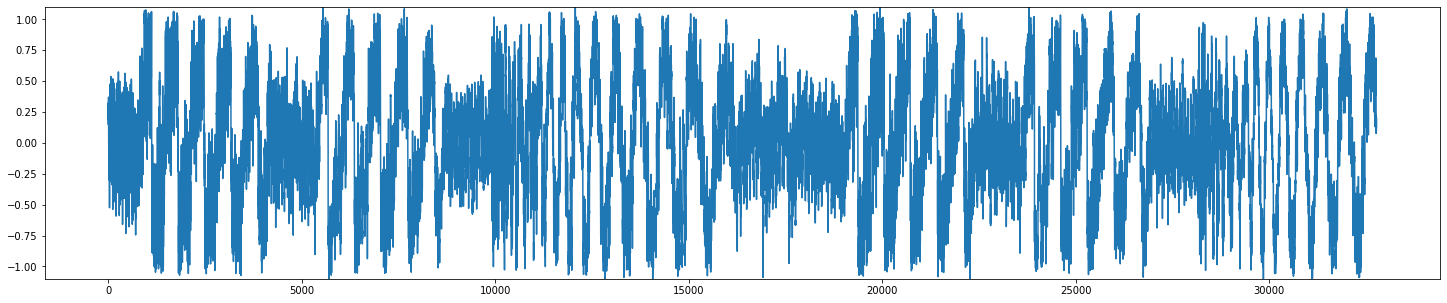

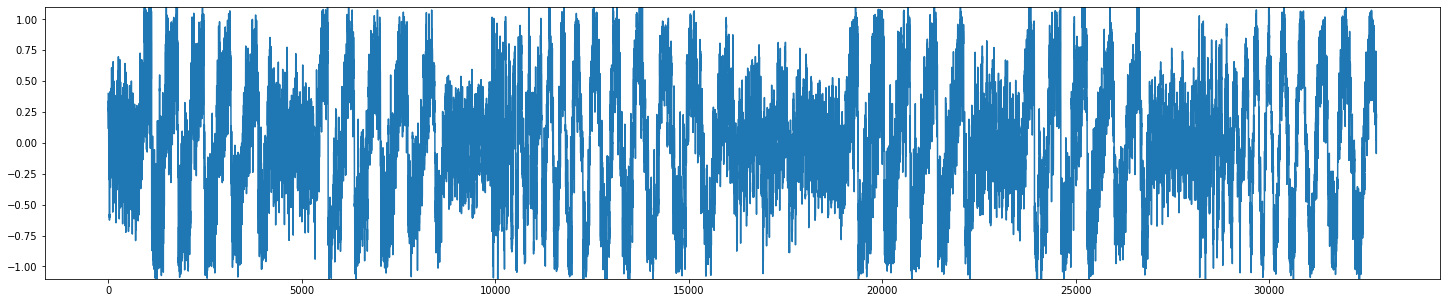

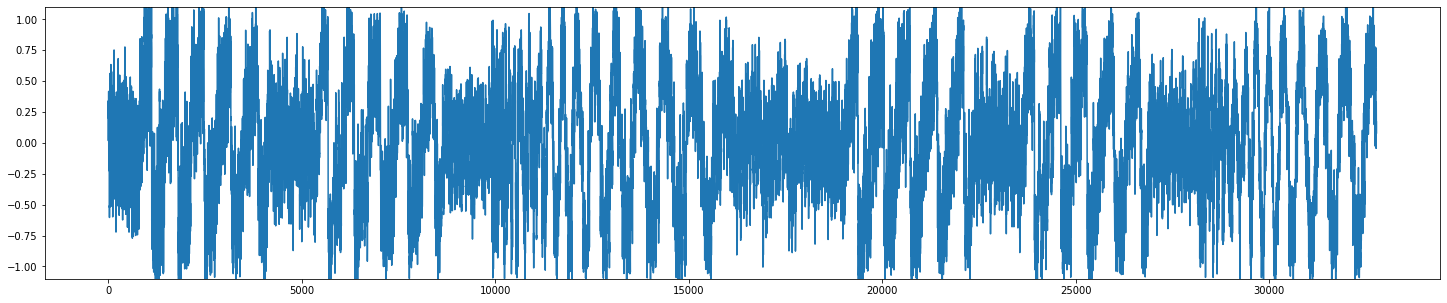

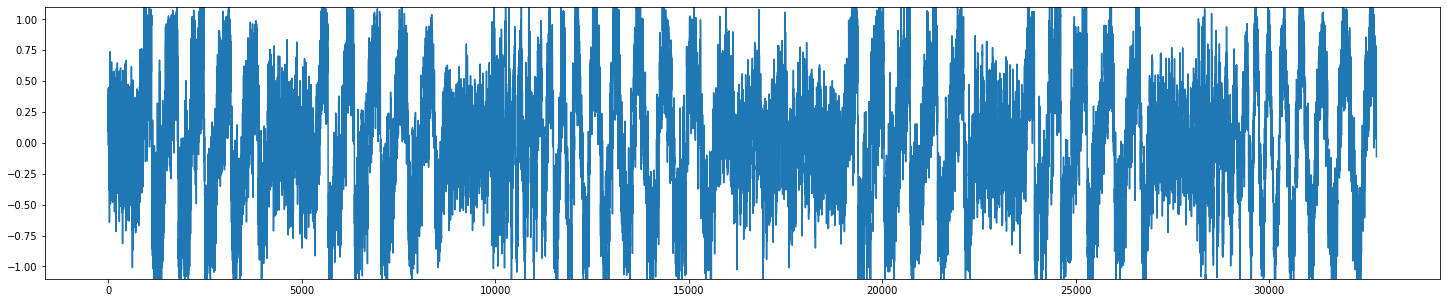

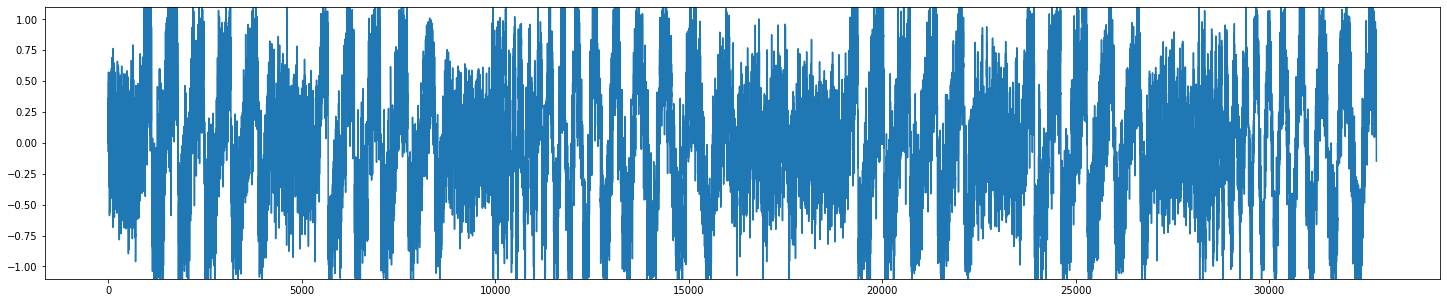

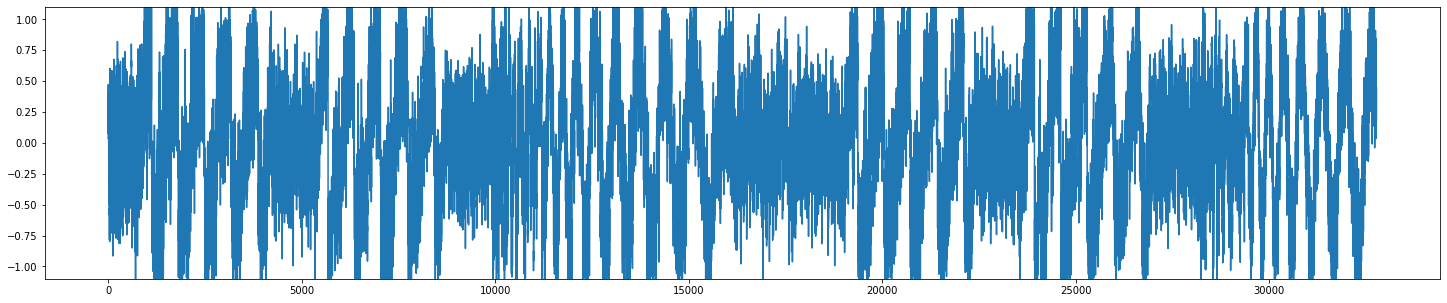

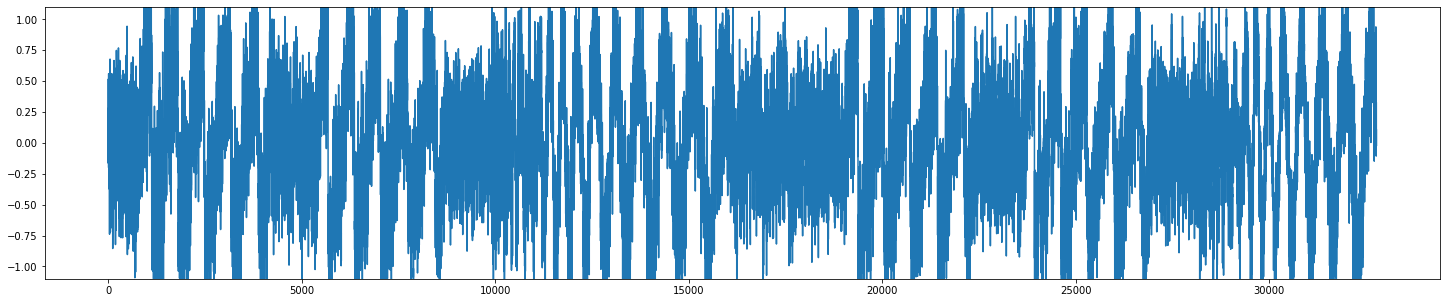

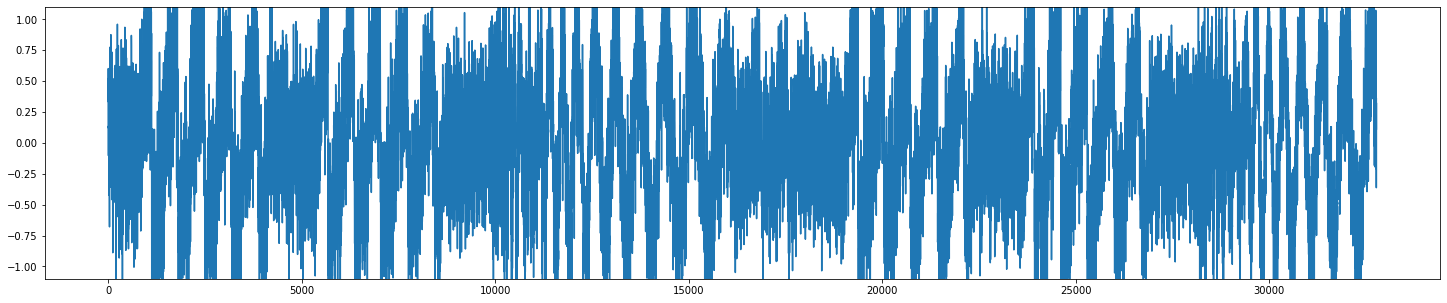

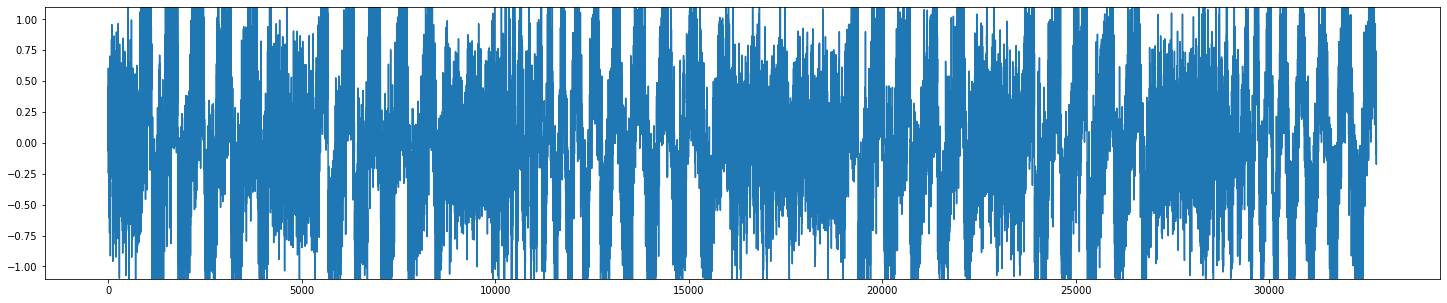

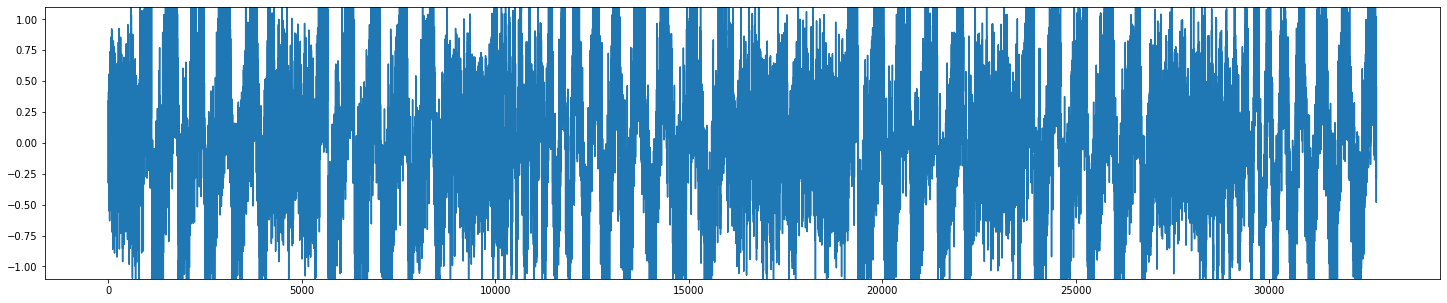

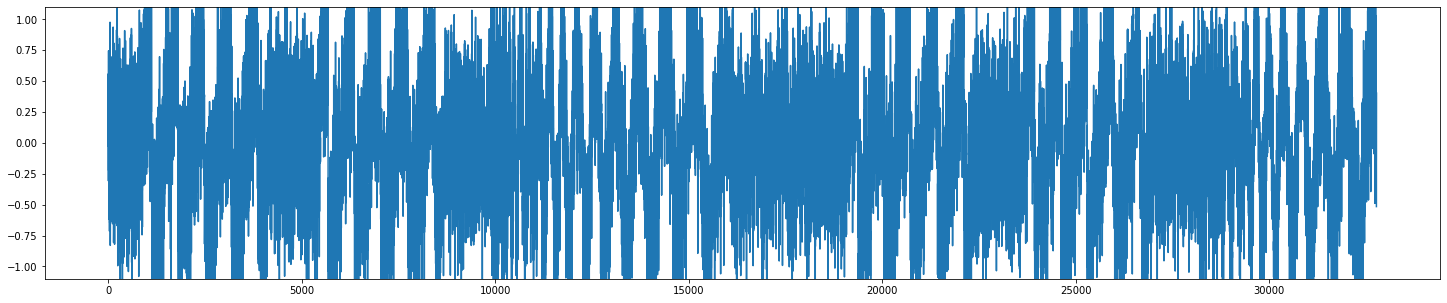

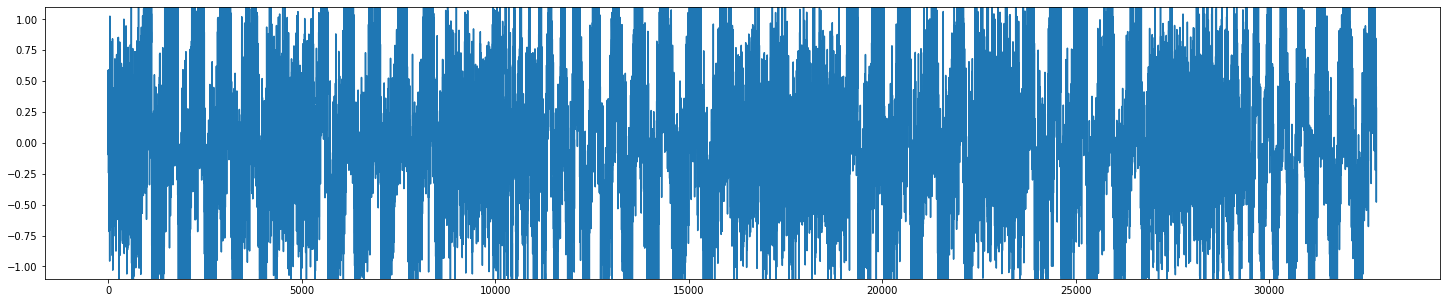

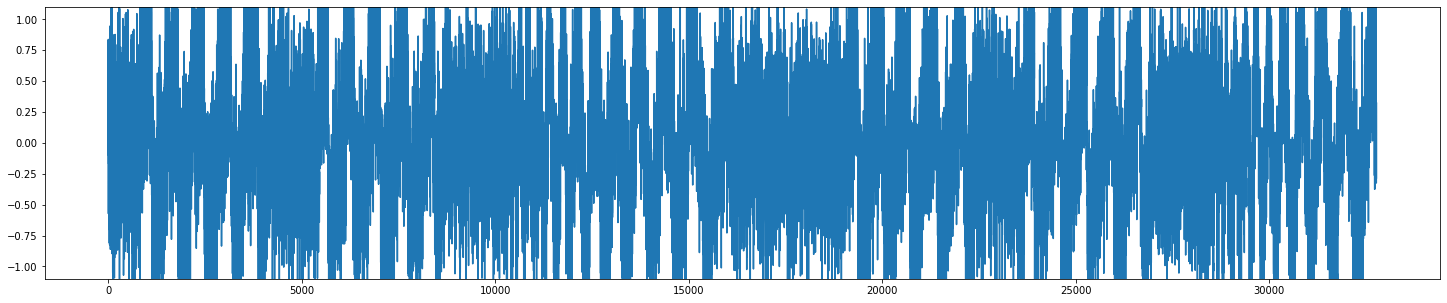

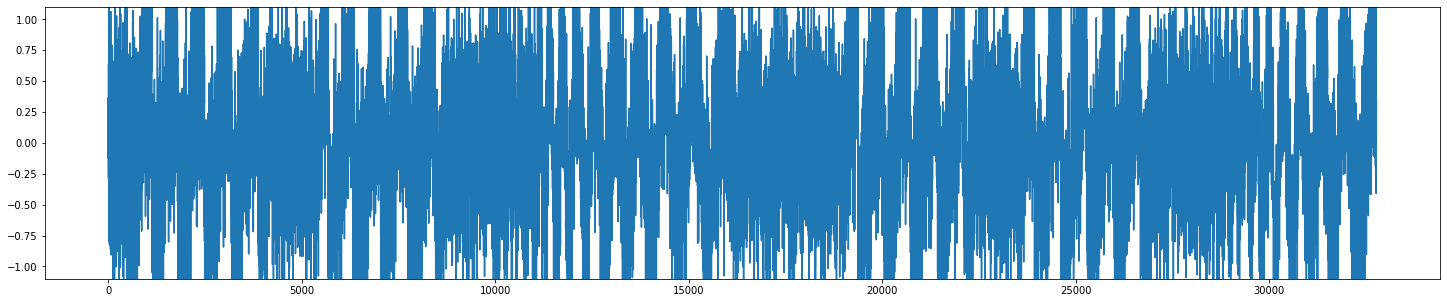

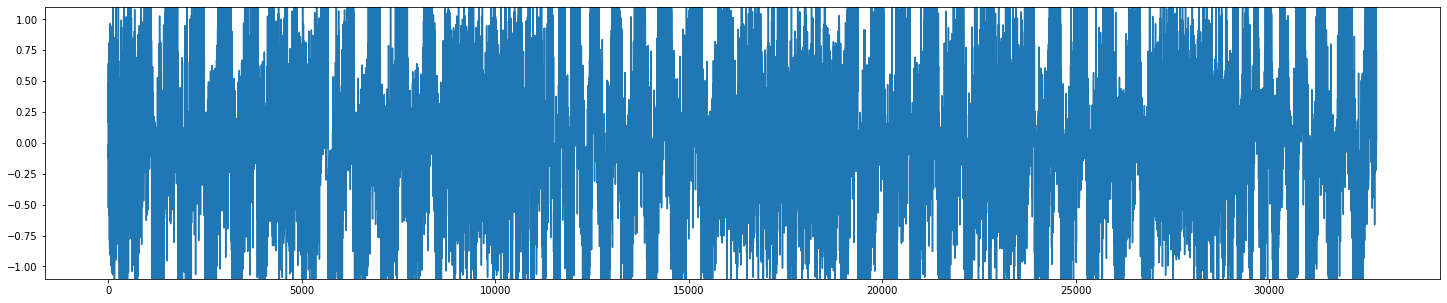

In [6]:
time_steps = 50
diff_constants = DiffusionConstants(time_steps=time_steps, scheduler='linear')
for idx in range(time_steps):
    if idx % 3 == 0:
        x_noisy, _ = forward_diffusion_sample(music_sample, torch.tensor((idx,)), diff_constants)
        plt.figure(figsize=(25, 5))
        plt.plot(x_noisy[0, ...].cpu().detach().numpy())
        plt.ylim((-3.1, 3.1))
        torchaudio.save('sample_out.mp3', x_noisy.cpu().detach(), 44100, format='mp3')
        IPython.display.Audio(filename="sample_out.mp3")
        plt.show()